In [1]:
using DataFrames,LinearAlgebra,CSV,DelimitedFiles,SparseArrays,GLPK,JuMP,Statistics, StatsBase

In [32]:
include("LPChoose.jl")

select_these_animals (generic function with 1 method)

In [33]:
LPChoose("smalldata.txt",100,0.01,weights_for_haplotypes = "equal")

--------------INPUT----------------------------
#Animal:6000
#Unique Haplotypes:27473
Haplotype Frequency Summary Stats:
Length:         27473
Missing Count:  0
Mean:           0.007280
Minimum:        0.000167
1st Quartile:   0.000167
Median:         0.000500
3rd Quartile:   0.002000
Maximum:        0.398333

--------------QUALITY CONTROL-------------------
----------minor haplotype frequency: 0.01--------
#Animal:6000
#Unique Haplotypes:3826
Haplotype Frequency Summary Stats:
Length:         3826
Missing Count:  0
Mean:           0.045800
Minimum:        0.010167
1st Quartile:   0.017667
Median:         0.031333
3rd Quartile:   0.058292
Maximum:        0.398333

---------------2ND APPLICATION--------------------
------------identify best 100 animals--------------
--representing maximum proportions of haplotypes--
-----------RUN LINEAR PROGRAMMING-----------------

HAHA2


identifying most representative animals ...  2%|▏       |  ETA: 0:00:27

HAHA2


identifying most representative animals ...  4%|▍       |  ETA: 0:00:23

HAHA2


identifying most representative animals ...  6%|▌       |  ETA: 0:00:20

HAHA2


identifying most representative animals ...  8%|▋       |  ETA: 0:00:18

HAHA2


identifying most representative animals ... 10%|▊       |  ETA: 0:00:16

HAHA2


identifying most representative animals ... 12%|█       |  ETA: 0:00:15

HAHA2


identifying most representative animals ... 14%|█▏      |  ETA: 0:00:13

HAHA2


identifying most representative animals ... 16%|█▎      |  ETA: 0:00:12

HAHA2


identifying most representative animals ... 18%|█▌      |  ETA: 0:00:11

HAHA2


identifying most representative animals ... 20%|█▋      |  ETA: 0:00:10

HAHA2
HAHA2


identifying most representative animals ... 24%|█▉      |  ETA: 0:00:09

HAHA2


identifying most representative animals ... 26%|██▏     |  ETA: 0:00:08

HAHA2
HAHA2


identifying most representative animals ... 30%|██▍     |  ETA: 0:00:07

HAHA2
HAHA2


identifying most representative animals ... 34%|██▊     |  ETA: 0:00:06

HAHA2
HAHA2


identifying most representative animals ... 38%|███     |  ETA: 0:00:05

HAHA2
HAHA2
HAHA2


identifying most representative animals ... 44%|███▌    |  ETA: 0:00:04

HAHA2
HAHA2
HAHA2


identifying most representative animals ... 50%|████    |  ETA: 0:00:03

HAHA2
HAHA2
HAHA2


identifying most representative animals ... 56%|████▌   |  ETA: 0:00:03

HAHA2
HAHA2
HAHA2
HAHA2


identifying most representative animals ... 64%|█████▏  |  ETA: 0:00:02

HAHA2
HAHA2
HAHA2
HAHA2


identifying most representative animals ... 72%|█████▊  |  ETA: 0:00:01

HAHA2
HAHA2
HAHA2
HAHA2


identifying most representative animals ... 80%|██████▍ |  ETA: 0:00:01

HAHA2
HAHA2
HAHA2
HAHA2
HAHA2


identifying most representative animals ... 90%|███████▎|  ETA: 0:00:00

HAHA2
HAHA2
HAHA2
HAHA2
HAHA2


identifying most representative animals ...100%|████████| Time: 0:00:04



0.9976476738107685 of the unique haplotypes in the population is covered.
0.9993747137346122 of the genome in the population is covered.

IDs for identified animals were saved in identified_animals.txt.

---------------------DONE-------------------------


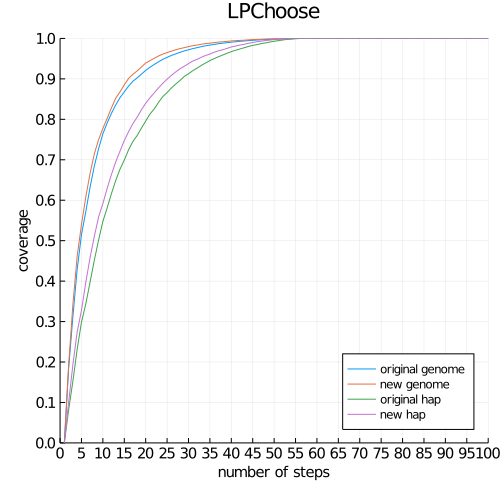

In [21]:
using Plots, DelimitedFiles
genome_coverage1 = "original/genome_coverage.txt"
genome_coverage2 = "new/genome_coverage.txt"
hap_coverage1 = "original/haplotype_coverage.txt"
hap_coverage2 = "new/haplotype_coverage.txt"

g1      = readdlm(genome_coverage1,',',header=true)[1][:,2][1:100]
g2      = readdlm(genome_coverage2,',',header=true)[1][:,2][1:100]
h1      = readdlm(hap_coverage1,',',header=true)[1][:,2][1:100]
h2      = readdlm(hap_coverage2,',',header=true)[1][:,2][1:100]
nsteps  = 100

line_plot=plot(size=(500,500),
     xlim=(0,nsteps),ylim=(0,1),
     xaxis = (font(10), 0:5:nsteps),yaxis = (font(10), 0:0.1:1),
     title="LPChoose",
     ylabel = "coverage",xlabel = "number of steps",
     legend=:bottomright
)

plot!(1:nsteps,g1,markercolor=:green,label="original genome")
plot!(1:nsteps,g2,markercolor=:red,label="new genome")
plot!(1:nsteps,h1,markercolor=:blue,label="original hap")
plot!(1:nsteps,h2,markercolor=:yellow,label="new hap")

In [5]:
sum([A01now[:,i]*select_this_animal[i] for i= 1:3])

10-element Array{Float64,1}:
  0.31617447475434735
  1.8905559845659405
 -2.0390350670668136
  2.1731199662796263
 -1.1395533251025598
 -0.3613401409284478
 -1.0889651190886263
 -0.1681267163337099
  2.108052009233217
  4.082959168905739